<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/python_/blob/main/association_groceries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# CSV 파일 로드 (이미 경로와 구분자는 알고 있음)
df = pd.read_csv('/content/groceries.csv', delimiter=';')

# 각 거래를 쉼표로 구분된 항목들로 분할하여 리스트로 저장
df['items'] = df['citrus fruit,semi-finished bread,margarine,ready soups'].apply(lambda x: x.split(','))

# 모든 유니크한 아이템 리스트 생성
all_items = sorted(set(item.strip() for sublist in df['items'] for item in sublist))

# One-Hot Encoding을 위한 빈 데이터프레임 생성
encoded_df = pd.DataFrame(0, index=df.index, columns=all_items)

# 각 거래에서 아이템이 있으면 1로 표시
for index, transaction in enumerate(df['items']):
    for item in transaction:
        encoded_df.at[index, item.strip()] = 1

# 결과 확인
print(encoded_df.head())


   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                      0         0                 0                 0   
1                      0         0                 0                 0   
2                      0         0                 0                 0   
3                      0         0                 0                 0   
4                      0         0                 1                 0   

   baby cosmetics  baby food  bags  baking powder  bathroom cleaner  beef  \
0               0          0     0              0                 0     0   
1               0          0     0              0                 0     0   
2               0          0     0              0                 0     0   
3               0          0     0              0                 0     0   
4               0          0     0              0                 0     0   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...       0 

##데이터의 구조 및 특징

1. 거래 기록:

  - 데이터는 총 9834개의 거래 내역으로 이루어져 있으며, 각 행은 한 번의 거래를 나타냅니다.
  - 각 거래는 여러 상품을 포함할 수 있으며, 상품들은 쉼표(,)로 구분되어 기록되어 있습니다.

2.상품 목록:

  - 각 거래에 포함된 상품들은 일반적인 식료품으로 구성되어 있습니다. 예를 들어, "whole milk", "yogurt", "bread", "butter"와 같은 일상적으로 구매되는 식료품들이 포함됩니다.
  - 상품의 개수는 고정되어 있지 않으며, 한 거래에서 구매된 상품의 수는 다를 수 있습니다. 어떤 거래는 한두 개의 상품만 포함하고 있을 수 있고, 다른 거래는 열 개 이상의 상품을 포함할 수도 있습니다.

3. 데이터의 형식:

  - 데이터는 CSV 형식으로 저장되어 있으며, 처음에 하나의 열(Column)로 구성되어 있습니다. 이 열은 각 거래에서 구매된 상품들의 목록을 쉼표로 구분한 형태로 기록하고 있습니다.
  - 각 상품은 문자열(String)로 기록되어 있으며, 개별 거래는 문자열로 구성된 리스트로 나타낼 수 있습니다.

4. 연관 분석의 대상:

  - 이 데이터는 주로 연관 규칙 학습에 사용됩니다. 연관 규칙 학습은 특정 상품이 구매되었을 때 다른 특정 상품이 함께 구매될 확률을 찾는 데 중점을 둡니다. 이를 통해 "이 상품을 구매한 고객은 이 상품도 구매할 가능성이 높다"는 식의 규칙을 도출할 수 있습니다.
  - 예를 들어, 데이터 분석을 통해 "bread"와 "butter"가 자주 함께 구매된다는 규칙을 발견할 수 있으며, 이를 통해 마케팅이나 상품 배치 전략을 수립할 수 있습니다.

###연관 분석(Association Analysis)은 데이터 마이닝의 한 방법으로, 주로 대규모 데이터셋에서 항목 간의 관계를 찾는 데 사용됩니다. 가장 흔한 응용 중 하나는 장바구니 분석(Basket Analysis)으로, 이 분석은 고객이 함께 구매하는 상품들의 패턴을 찾아내는 데 도움을 줍니다. 연관 분석은 추천 시스템, 마케팅 전략 수립, 재고 관리 등 다양한 분야에 활용될 수 있습니다.

####연관 분석의 기본 개념
  연관 분석은 특정 이벤트나 항목이 발생했을 때 다른 항목이 발생할 확률을 찾는 데 중점을 둡니다. 이 과정에서 주로 사용하는 메트릭은 지지도(Support), 신뢰도(Confidence), **향상도(Lift)**입니다.

1. 지지도 (Support)
지지도는 특정 항목 집합이 데이터 내에서 얼마나 자주 발생하는지를 나타내는 지표입니다.

  - 정의:
Support
(
𝑋
)
=
X를 포함하는 거래의 수
전체 거래 수
Support(X)=
전체 거래 수
X를 포함하는 거래의 수
​

  - 예시: 데이터에서 100개의 거래 중 20개 거래에 "우유"가 포함되어 있다면, 우유의 지지도는 0.2입니다.

2. 신뢰도 (Confidence)
신뢰도는 연관 규칙의 조건이 되는 항목(Antecedent)이 발생했을 때, 그 결과로 나타나는 항목(Consequent)이 함께 발생할 확률을 나타냅니다.

  - 정의:
Confidence
(
𝑋
⇒
𝑌
)
=
X와 Y를 모두 포함하는 거래의 수
X를 포함하는 거래의 수
Confidence(X⇒Y)=
X를 포함하는 거래의 수
X와 Y를 모두 포함하는 거래의 수
​

  - 예시: "우유"를 구매한 거래 중 10개가 "빵"도 구매한 거래라면, "우유 → 빵"의 신뢰도는 0.5입니다.

3. 향상도 (Lift)
향상도는 X와 Y의 발생이 독립적인지, 아니면 서로 연관되어 있는지를 나타내는 지표입니다.

  - 정의:
Lift
(
𝑋
⇒
𝑌
)
=
Confidence
(
𝑋
⇒
𝑌
)
Support
(
𝑌
)
Lift(X⇒Y)=
Support(Y)
Confidence(X⇒Y)
​

  - 해석:
Lift > 1: X와 Y가 서로 양의 상관관계를 가짐. 즉, X가 발생할 때 Y도 발생할 가능성이 큽니다.
Lift = 1: X와 Y는 독립적.
Lift < 1: X가 발생하면 Y가 발생할 가능성이 작음.

####연관 분석 알고리즘
  연관 분석을 수행하는 데 자주 사용되는 알고리즘은 Apriori와 FP-Growth입니다.


1. Apriori 알고리즘
  Apriori는 반복적으로 데이터셋을 탐색하면서 빈번한 항목 집합을 찾고, 그 집합을 이용해 연관 규칙을 도출하는 알고리즘입니다.

  - 단계:

  빈번한 항목 집합 도출: 최소 지지도(주어진 임계값)를 충족하는 항목 집합을 반복적으로 찾습니다.
  연관 규칙 생성: 빈번한 항목 집합을 기반으로 신뢰도와 향상도를 계산하여 유의미한 연관 규칙을 생성합니다.
  - 장점: 이해하기 쉽고, 구현이 간단합니다.

  - 단점: 큰 데이터셋에서는 속도가 느릴 수 있습니다.

2. FP-Growth 알고리즘
  FP-Growth(Frequent Pattern Growth)는 트리 구조를 사용해 데이터셋을 압축하고, Apriori보다 빠르게 연관 규칙을 도출할 수 있는 알고리즘입니다.

  - 단계:

    - FP 트리 구성: 데이터셋을 압축하여 빈번한 항목 집합을 포함한 트리를 생성합니다.
    - 빈번한 패턴 추출: FP 트리를 탐색하여 빈번한 패턴을 도출하고, 이를 기반으로 연관 규칙을 생성합니다.
  - 장점: 데이터셋이 커질수록 Apriori보다 더 효율적입니다.

  - 단점: 이해하기 어렵고, 트리 생성이 복잡할 수 있습니다.

####연관 분석의 응용
  - 장바구니 분석: 고객이 자주 함께 구매하는 제품들을 파악하여 매장 내 제품 배치나 번들 상품 기획에 활용할 수 있습니다.

  - 추천 시스템: 특정 상품을 구매한 고객에게 연관성이 높은 다른 상품을 추천하는 데 사용됩니다. 예를 들어, "이 상품을 구매한 고객들은 이 상품도 구매했습니다"와 같은 추천이 가능합니다.

  - 재고 관리: 자주 함께 구매되는 제품들을 분석하여 재고를 효율적으로 관리하고, 제품의 배치를 최적화할 수 있습니다.

  - 마케팅 전략: 특정 제품이 자주 구매될 때 함께 구매되는 제품을 분석하여 크로스 셀링(Cross-Selling) 전략을 수립하거나, 프로모션 기획에 활용할 수 있습니다.

####결론
  연관 분석은 데이터셋에서 항목들 간의 패턴을 발견하여 비즈니스 인사이트를 도출하는 데 매우 유용한 방법입니다. 이를 통해 마케팅 전략을 개선하고, 고객에게 보다 개인화된 추천을 제공할 수 있습니다. Apriori와 FP-Growth는 연관 분석을 수행하는 데 널리 사용되는 알고리즘이며, 데이터의 크기와 특성에 따라 적절한 알고리즘을 선택하는 것이 중요합니다.

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apriori 알고리즘을 사용하여 빈번한 항목 집합 도출 (최소 지지도 1%)
frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True)

# 연관 규칙 도출 (기준: lift)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 결과 확인
print(rules.head())


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


          antecedents         consequents  antecedent support  \
0  (other vegetables)              (beef)            0.193512   
1              (beef)  (other vegetables)            0.052471   
2              (beef)        (rolls/buns)            0.052471   
3        (rolls/buns)              (beef)            0.183954   
4   (root vegetables)              (beef)            0.109010   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.052471  0.019727    0.101944  1.942869  0.009574    1.055089   
1            0.193512  0.019727    0.375969  1.942869  0.009574    1.292384   
2            0.183954  0.013626    0.259690  1.411714  0.003974    1.102303   
3            0.052471  0.013626    0.074074  1.411714  0.003974    1.023331   
4            0.052471  0.017389    0.159515  3.040058  0.011669    1.127360   

   zhangs_metric  
0       0.601742  
1       0.512171  
2       0.307791  
3       0.357383  
4       0.753161  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


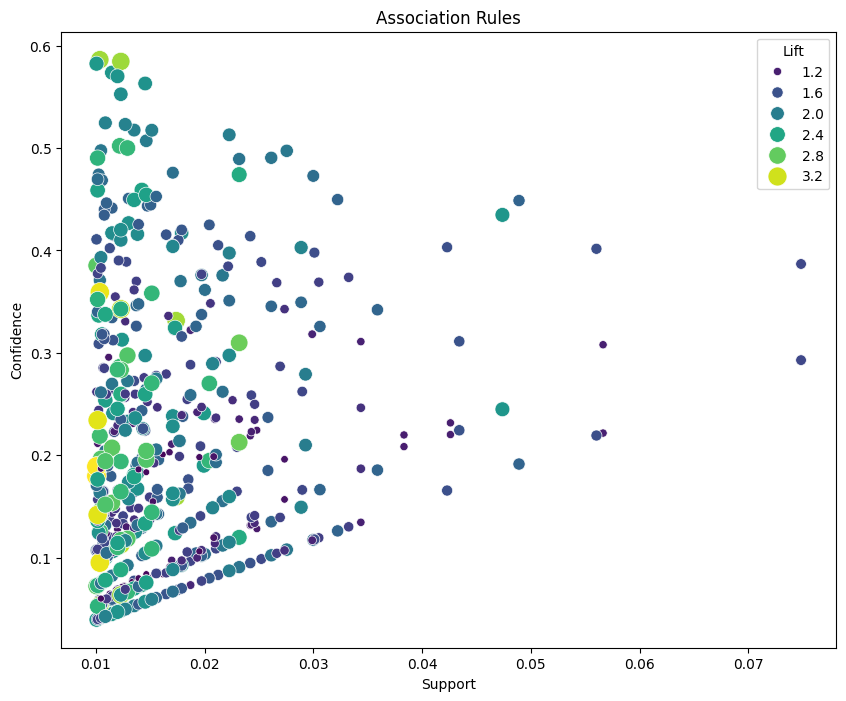

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules, palette='viridis', sizes=(20, 200))

plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='best', title='Lift')
plt.show()


1. 산점도 (Scatter Plot)
산점도는 지지도(Support), 신뢰도(Confidence), 그리고 **향상도(Lift)**를 한눈에 볼 수 있도록 도와줍니다.

  - x축 (Support): 규칙이 얼마나 자주 나타나는지 보여줍니다. 지지도가 높을수록, 해당 규칙이 데이터에서 더 자주 발생합니다.
  - y축 (Confidence): 선행자가 발생할 때 결과자가 발생할 확률을 나타냅니다. 신뢰도가 높을수록, 규칙이 더 정확하게 예측할 수 있습니다.
  - 점의 크기 (Lift): 향상도는 규칙의 유의미성을 나타냅니다. Lift가 1보다 클수록, 규칙은 우연 이상의 의미를 가집니다. 점의 크기가 클수록, Lift 값이 크다는 의미입니다.
  - 점의 색상 (Lift): Lift 값에 따라 점의 색상이 변합니다. 색상이 진할수록 Lift가 높습니다.

* 해석:

  점이 오른쪽 상단에 위치할수록 해당 규칙은 자주 발생하며, 예측력이 높고 의미가 있는 규칙이라는 뜻입니다.
  Lift 값이 큰 규칙(큰 점)은 더 의미 있는 규칙입니다.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


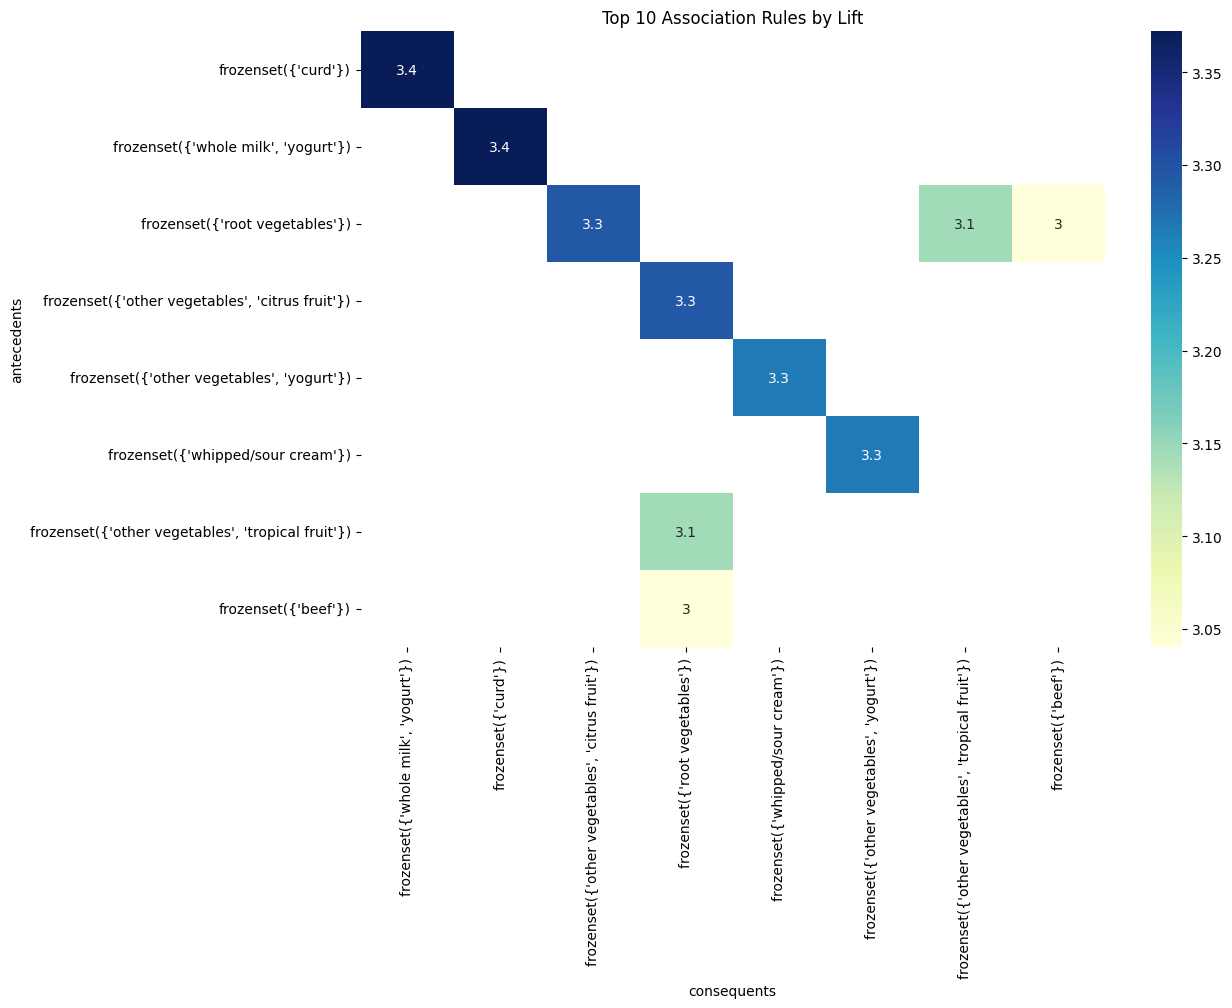

In [4]:
# Extract top 10 rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Create a pivot table
pivot = top_rules.pivot(index='antecedents', columns='consequents', values='lift')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title('Top 10 Association Rules by Lift')
plt.show()


2. 히트맵 (Heatmap)
히트맵은 **향상도(Lift)**를 기준으로 연관 규칙을 나타냅니다.

  - 행 (Antecedents): 연관 규칙에서 선행자로 작용하는 항목들입니다.
  - 열 (Consequents): 연관 규칙에서 결과자로 작용하는 항목들입니다.
  - 셀의 색상: Lift 값에 따라 셀의 색상이 진해집니다. 색상이 진할수록 규칙이 더 강한 상관관계를 가집니다.

* 해석:

  색상이 진한 셀은 강한 연관 규칙을 의미합니다. 즉, 선행자와 결과자가 함께 발생할 가능성이 매우 높은 규칙입니다.
  특정 선행자와 결과자 간의 연관성을 확인할 수 있습니다.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


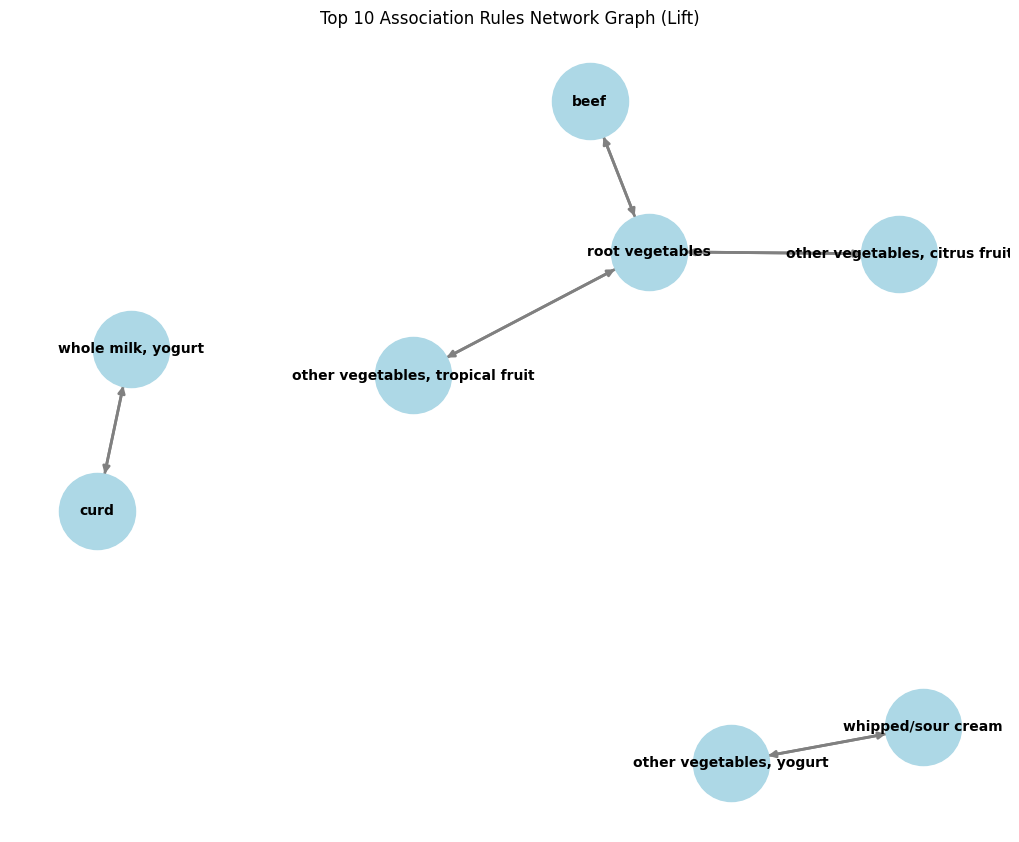

In [22]:
import networkx as nx

# Create a directed graph from the top 10 rules
G = nx.DiGraph()

for i, row in top_rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['lift'])

# Draw the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G,k=1.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=2)

plt.title('Top 10 Association Rules Network Graph (Lift)')
plt.show()


3. 네트워크 그래프 (Network Graph)
  
  네트워크 그래프는 항목들 간의 복잡한 관계를 시각적으로 표현합니다.

  - 노드 (Nodes): 각각의 노드는 특정 항목을 나타냅니다.
  - 엣지 (Edges): 노드 간의 연결선은 연관 규칙을 나타냅니다. 선행자에서 결과자로의 방향을 나타냅니다.
  - 엣지의 두께: 규칙의 Lift 값에 비례하여 엣지의 두께가 결정됩니다. 두꺼운 선일수록 더 유의미한 규칙입니다.

* 해석:

  서로 많은 엣지로 연결된 항목들은 자주 함께 발생하는 항목들이며, 그 규칙이 중요합니다.
  두꺼운 선은 강한 연관성을 의미하며, 그 두 노드(항목) 간의 관계가 매우 유의미하다는 뜻입니다.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-eb7a576c4597>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rule', y='lift', data=top_rules, palette='viridis')


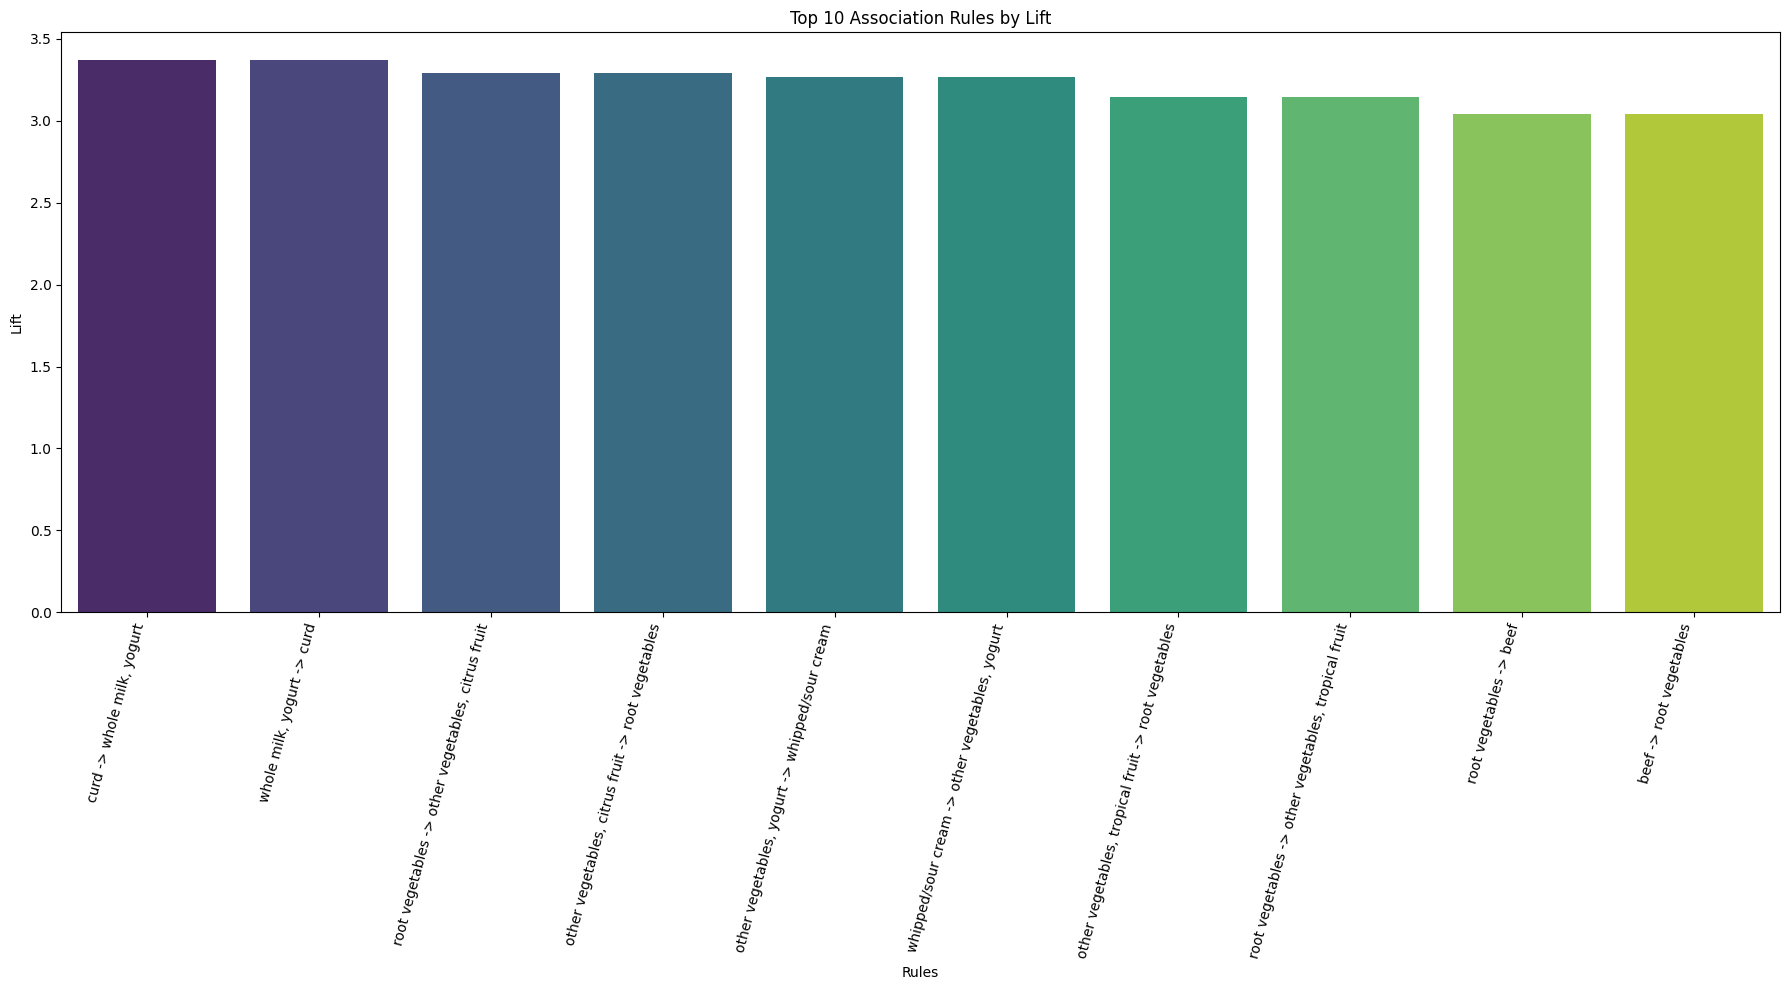

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 규칙 이름을 생성
top_rules['rule'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' + top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# 그래프 생성
plt.figure(figsize=(18, 10))  # 그래프 크기를 더 키움
sns.barplot(x='rule', y='lift', data=top_rules, palette='viridis')

# 각 막대에 규칙 이름 추가 (이 경우 x축에 이미 이름이 있으므로 추가할 필요 없음)
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Rules')
plt.ylabel('Lift')

# x축 라벨 각도 조정
plt.xticks(rotation=75, ha='right')  # 라벨이 겹치지 않도록 회전 및 정렬
plt.tight_layout()  # 레이아웃 조정
plt.show()


4. 막대 그래프 (Bar Plot)

  막대 그래프는 상위 규칙을 **향상도(Lift)**를 기준으로 정렬하여 비교할 수 있습니다.

  - x축 (Lift): 각 규칙의 Lift 값을 나타냅니다. Lift 값이 클수록 더 유의미한 규칙입니다.
  - y축 (Rules): 각 규칙을 텍스트로 표현합니다. 선행자와 결과자 간의 관계를 보여줍니다.

* 해석:

  Lift 값이 높은 규칙일수록 상위에 위치하며, 이 규칙들이 더 중요하다는 뜻입니다.
  
  규칙을 하나씩 비교하며 가장 의미 있는 규칙들을 빠르게 파악할 수 있습니다.